## Sistema Massa-Mola com Atrito (Sistema Homogêneo)

O sistema massa-mola com atrito representa um dos modelos fundamentais em dinâmica e teoria de oscilações. Este sistema físico consiste em uma massa $m$ conectada a uma mola de constante elástica $k$, sujeita a uma força de atrito proporcional à velocidade com coeficiente $c$.

### Modelagem Matemática

O comportamento dinâmico do sistema pode ser descrito pela equação diferencial de segunda ordem:

$$m\frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = 0$$

onde:
- $x(t)$ é a posição da massa em função do tempo
- $m$ é a massa do objeto
- $k$ é a constante elástica da mola
- $c$ é o coeficiente de atrito viscoso

### Sistema de Equações de Primeira Ordem

Para resolver numericamente, convertemos a EDO de segunda ordem em um sistema de equações diferenciais de primeira ordem:

$$\begin{cases}
\frac{dx}{dt} = v \\
\frac{dv}{dt} = -\frac{1}{m}(kx + cv)
\end{cases}$$

Onde precisamos então definir as condições iniciais para $x_0$ e $v_0$.

### Características do Sistema

Este é um **sistema homogêneo** (sem forçamento externo) que apresenta comportamento oscilatório amortecido. Dependendo dos valores dos parâmetros $m$, $k$ e $c$, o sistema pode exibir:

1. **Subamortecimento** ($c < 2\sqrt{km}$): Oscilações com amplitude decrescente
2. **Amortecimento crítico** ($c = 2\sqrt{km}$): Retorno ao equilíbrio sem oscilação
3. **Superamortecimento** ($c > 2\sqrt{km}$): Aproximação lenta ao equilíbrio sem oscilação

A energia do sistema é dissipada pelo atrito, fazendo com que as oscilações diminuam progressivamente até que o sistema atinja o equilíbrio estável em $x = 0$.


# Código

Durante as iterações, para aproximarmos a solução pelo Método de Euler, usaremos o seguinte processo:

$$\begin{cases}
x(t_{k+1}) = x(t_k) + h\frac{dx}{dt} \\
v(t_{k+1}) = v(t_k) + h\frac{dv}{dt}
\end{cases}$$

onde $h$ será definido como, tendo $n$ iterações:

$$h = \frac{t_{n} - t_0}{n}$$

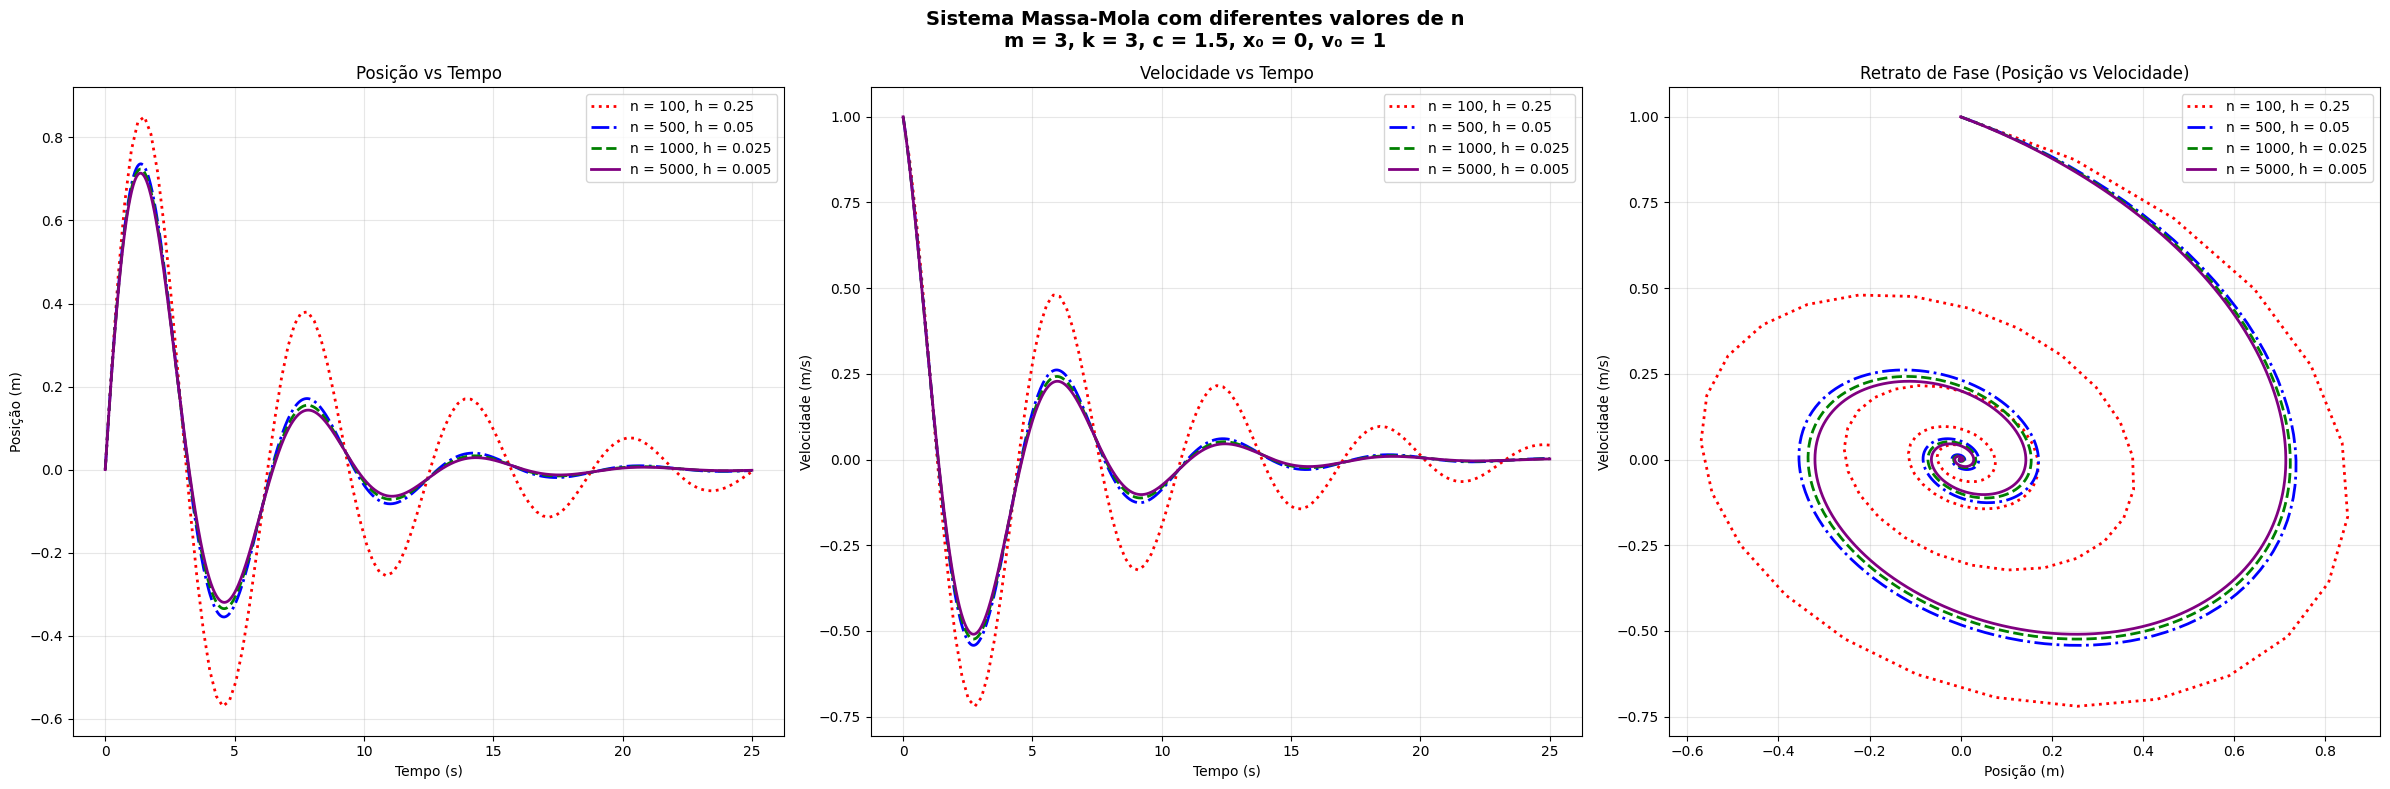

Análise de Convergência:
     n   Erro RMS Posição  Erro RMS Velocidade
--------------------------------------------------
   100           0.116474             0.116667
   500           0.015426             0.015490
  1000           0.007383             0.007416
  5000           0.001373             0.001380


In [77]:
# Comparação para diferentes valores de n
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sistema
m = 3
k = 3  
c = 1.5
x0 = 0
v0 = 1
t_inicial = 0
t_final = 25

# Diferentes valores de n para comparação
n_values = [100, 500, 1000, 5000]
colors = ['red', 'blue', 'green', 'purple']
line_styles = [':', '-.', '--', '-']

# Função para resolver o sistema
def solve_system(n, m, k, c, x0, v0, t_inicial, t_final):
    h = (t_final - t_inicial) / n
    t = np.linspace(t_inicial, t_final, n)
    
    x = np.zeros(n)
    v = np.zeros(n)
    x[0] = x0
    v[0] = v0
    
    for i in range(n-1):
        x[i+1] = x[i] + h * v[i]
        v[i+1] = v[i] + h * (-(1/m)*(k*x[i] + c*v[i]))
    
    return t, x, v

# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle(f'Sistema Massa-Mola com diferentes valores de n\nm = {m}, k = {k}, c = {c}, x₀ = {x0}, v₀ = {v0}', 
             fontsize=14, fontweight='bold')

# Plot 1: Posição vs Tempo
ax1 = axes[0]
ax1.set_title('Posição vs Tempo')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Posição (m)')
ax1.grid(True, alpha=0.3)

# Plot 2: Velocidade vs Tempo  
ax2 = axes[1]
ax2.set_title('Velocidade vs Tempo')
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Velocidade (m/s)')
ax2.grid(True, alpha=0.3)

# Plot 3: Retrato de fase
ax3 = axes[2]
ax3.set_title('Retrato de Fase (Posição vs Velocidade)')
ax3.set_xlabel('Posição (m)')
ax3.set_ylabel('Velocidade (m/s)')
ax3.grid(True, alpha=0.3)

# Resolver e plotar para cada valor de n
for i, n in enumerate(n_values):
    t, x, v = solve_system(n, m, k, c, x0, v0, t_inicial, t_final)
    h = (t_final - t_inicial) / n
    
    # Plot posição vs tempo
    ax1.plot(t, x, color=colors[i], linestyle=line_styles[i], 
             linewidth=2, label=f'n = {n}, h = {h}')
    
    # Plot velocidade vs tempo
    ax2.plot(t, v, color=colors[i], linestyle=line_styles[i], 
             linewidth=2, label=f'n = {n}, h = {h}')
    
    # Plot retrato de fase
    ax3.plot(x, v, color=colors[i], linestyle=line_styles[i], 
             linewidth=2, label=f'n = {n}, h = {h}')

# Adicionar legendas
for ax in axes.flat:
    ax.legend()

plt.tight_layout()
plt.show()

# Análise quantitativa da convergência
print("Análise de Convergência:")
print("=" * 50)

# Calcular solução com n muito alto como referência
t_ref, x_ref, v_ref = solve_system(100000, m, k, c, x0, v0, t_inicial, t_final)
t_ref_interp = np.linspace(t_inicial, t_final, 1000)  # Grade comum para interpolação

print(f"{'n':>6} {'Erro RMS Posição':>18} {'Erro RMS Velocidade':>20}")
print("-" * 50)

for n in n_values:
    t, x, v = solve_system(n, m, k, c, x0, v0, t_inicial, t_final)
    
    # Interpolar soluções para grade comum
    # A interpolação é necessária porque diferentes valores de n geram grades temporais
    # com diferentes números de pontos. Para calcular o erro RMS entre soluções,
    # precisamos comparar os valores nos mesmos instantes de tempo.
    x_interp = np.interp(t_ref_interp, t, x)
    v_interp = np.interp(t_ref_interp, t, v)
    x_ref_interp = np.interp(t_ref_interp, t_ref, x_ref)
    v_ref_interp = np.interp(t_ref_interp, t_ref, v_ref)
    
    # Calcular erro RMS
    erro_x = np.sqrt(np.mean((x_interp - x_ref_interp)**2))
    erro_v = np.sqrt(np.mean((v_interp - v_ref_interp)**2))
    
    print(f"{n:>6} {erro_x:>18.6f} {erro_v:>20.6f}")